# Machine Learning Mastery Python Mini Course
- https://machinelearningmastery.com/python-machine-learning-mini-course/

In [116]:
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier

## Creating DataFrames

### Create a simple DataFrame
- then load one in from a CSV at a URL

In [117]:
# Create a DataFrame from a NumPy array
myarray = np.array([[1, 2, 3], [4, 5, 6]])
rownames = ["a", "b"]
colnames = ["one", "two", "three"]
mydataframe = pd.DataFrame(myarray, index=rownames, columns=colnames)
mydataframe

,one,two,three
a,1,2,3
b,4,5,6


### Create DataFrame from CSV URL
- this is the Pima Indians "Onset of Diabetes Dataset"
- it's about the characteristics of the Pima Indians
- the final `"class"` column is the class of diabetes
- 0 meaning "no diabetes" and 1 meaning "has diabetes"

In [118]:
# Create a Pandas DataFrame from a CSV file from a URL
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ["preg", "plas", "pres", "skin", "test", "mass", "pedi", "age", "class"]
data = pd.read_csv(url, names=names)
data

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Examining the Data

### Describe

In [119]:
# Statistical Summary
data.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Scatter Plot Matrix
- shows each of the DataFrame columns combined with each other colum
- "pairwise scatterplot"
- where the data combines with itself, you get a histogram showing its distribution
- in the other views, you get points plotted
- so where `preg` aligns with `plas` for instance
    - if `preg` is on the y-axis and `plas` is on the x-axis
    - it plots the each point's `(x,y)` `(plas,preg)`

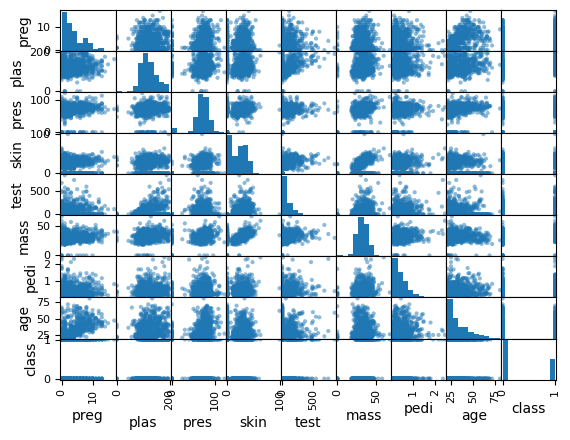

In [120]:
# Scatter Plot Matrix
scatter_matrix(data)
plt.show()

### Histogram
- Shows the distribution of each of the columns
- its those midline plots from the scatter plot matrix

array([[<Axes: title={'center': 'preg'}>,
        <Axes: title={'center': 'plas'}>,
        <Axes: title={'center': 'pres'}>],
       [<Axes: title={'center': 'skin'}>,
        <Axes: title={'center': 'test'}>,
        <Axes: title={'center': 'mass'}>],
       [<Axes: title={'center': 'pedi'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'class'}>]], dtype=object)

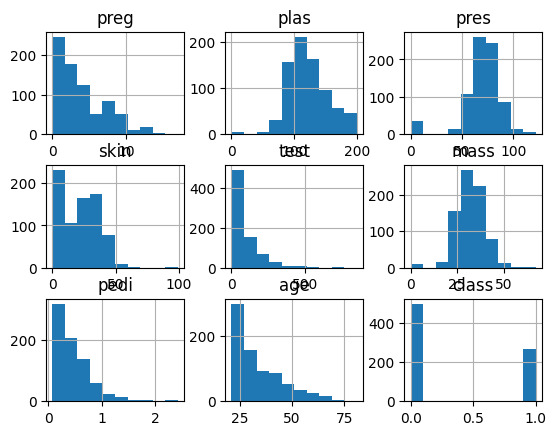

In [121]:
data.hist()

### Box Plot
- shows all of the distributions of the points on the same axes
- wonder why `test` has SO many outliers
- 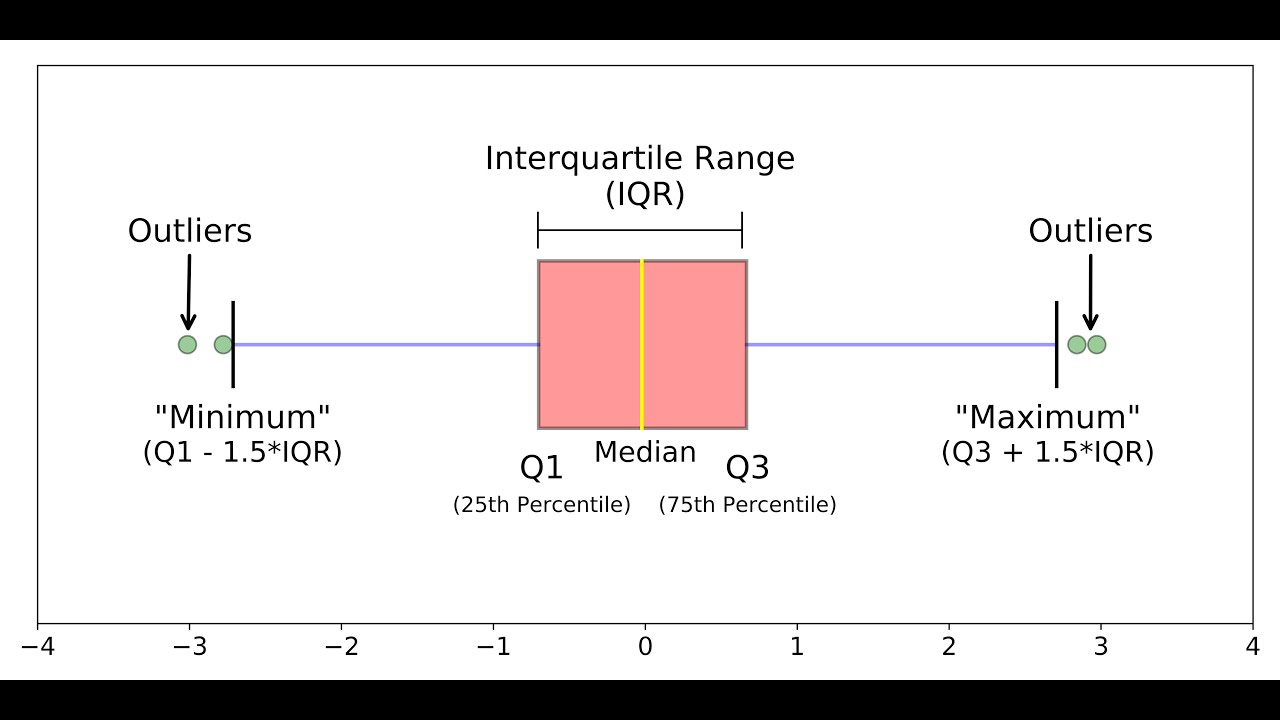

<Axes: >

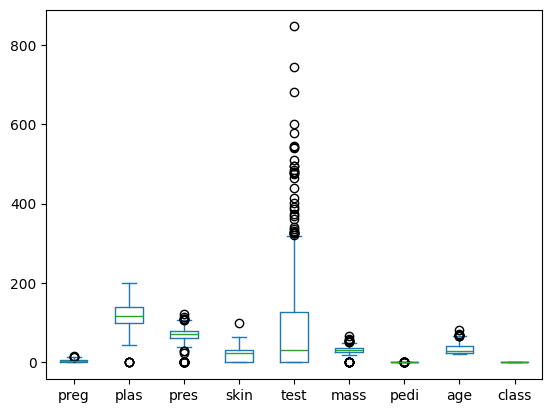

In [122]:
data.plot(kind="box")

## Pre-Processing Data
- Standardize numerical data (set mean to 0, standard deviation of 1) with `scale and center` options
- Normalize Numerical Data (min=1, max=1) using `range` option
- Advanced options like `Binarizing`


### Standardize (Scale and Center)
- mean = 0 , standard deviation = 1
- so basically this?
- hmm. Looks like image attachments don't play well with html image links, though Stack Overflow seems to think it should work?
- 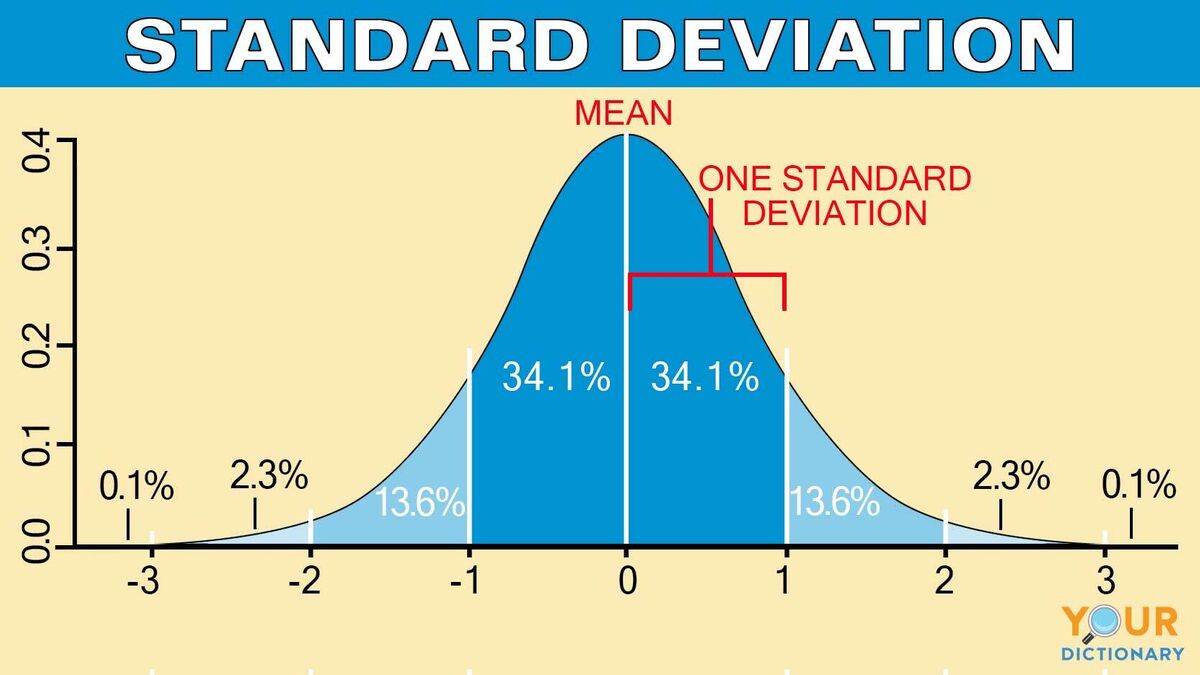

In [123]:
# Standardize data (0 mean, 1 stdev)
array = data.values
# separate array into input and output components
X = array[:, 0:8]  # all rows, columns 0-7 (it's not inclusive of the end)
Y = array[:, 8]  # all rows, column 8
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
# set NumPy to print numbers with up to 3 decimal places
np.set_printoptions(precision=3)
# show rows 0-4 of the rescaled data
# sreveals that mean is now 1, the standard deviation of all of these is 1
rescaledX[0:5, :]

array([[ 0.64 ,  0.848,  0.15 ,  0.907, -0.693,  0.204,  0.468,  1.426],
       [-0.845, -1.123, -0.161,  0.531, -0.693, -0.684, -0.365, -0.191],
       [ 1.234,  1.944, -0.264, -1.288, -0.693, -1.103,  0.604, -0.106],
       [-0.845, -0.998, -0.161,  0.155,  0.123, -0.494, -0.921, -1.042],
       [-1.142,  0.504, -1.505,  0.907,  0.766,  1.41 ,  5.485, -0.02 ]])

### Resampling
- **training dataset** - data used to train the machine learning algorithm
- you can't use data that was used to train the algorithm to estimate the accuracy of the model for predicting on new data
- **Resampling** - split the training dataset into subsets. Use some data to train, hold some back to check

### K-Fold Cross Validation
- split the dataset into `10` parts (9 to train, 1 to test)
- shuffle the order so the splits are randomized
- set a random seed so that it's reproducible

In [124]:
# create a K-fold cross-validator to split the dataset
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
# create a logistic regression model
model = LogisticRegression(solver="liblinear")
# train the logistic regresssion model, use the kfold to split the data up
results = cross_val_score(model, X, Y, cv=kfold)
# print the accuracy and standard deviation of the model
print(f"Accuracy: {results.mean() * 100.0:.3f}")
print(f"Standard Deviation: {results.std() * 100.0:.3f}")

Accuracy: 77.086
Standard Deviation: 5.091


## Evaluation Metrics
- many metrics can be used to evaluate how well an algorithm predicts on a dataset

### Logloss

In [125]:
results = cross_val_score(model, X, Y, cv=kfold, scoring="neg_log_loss")
print(f"Logloss: {results.mean():.3f}")
print(f"Logloss Standard Deviation: {results.std():.3f}")

Logloss: -0.494
Logloss Standard Deviation: 0.042


- the following headings were mentioned in the chapter on the site
- but there's no further explanation or accompanying code
- I guess I'm supposed to be figuring those out on my own?
- there are probably equivalent ones on each other chapter that I missed
### Confusion Matrix
### Classification Report
### RMSE and R-Squared

## Spot-Check Algorithms
- there are a LOT of machine learning algorithms
- figuring out which one performs best on your data will require some level of trial-and-error
- he refers to this as **spot-checking algorithms**

### Linear Algorithms
- **linear regression**
- **logistic regression**
- **linear discriminate analysis**

### Non-Linear Algorithms
- **KNN** - K-Nearest Neighbors
- **SVM** - Support Vector Machine
- **CART** - Classification and Regression Trees
- start out with the Boston House Price dataset

In [126]:
# Prepare data from the Boston House Price dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.data"
names = [
    "CRIM",
    "ZN",
    "INDUS",
    "CHAS",
    "NOX",
    "RM",
    "AGE",
    "DIS",
    "RAD",
    "TAX",
    "PTRATIO",
    "B",
    "LSTAT",
    "MEDV",
]
dataframe = pd.read_csv(url, delim_whitespace=True, names=names)
array = dataframe.values
X = array[:, 0:13]
Y = array[:, 13]
kfold = KFold(n_splits=10, random_state=7, shuffle=True)

C:\Users\gillm\AppData\Local\Temp\ipykernel_13404\190392337.py:19: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = pd.read_csv(url, delim_whitespace=True, names=names)


In [127]:
# Train a K-Nearest Neighbors model on the Boston House Price dataset
model = KNeighborsRegressor()
scoring = "neg_mean_squared_error"
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(f"Negative MSE: {results.mean():<.3f}\nStd Dev: {results.std():<.3f}")

Negative MSE: -38.852
Std Dev: 14.661


### Ensemble Algorithms
- **random forest**
- **stochastic gradient boosting**

## Model Comparison and Selection
- after spot checking a few algorithms, must compare performance
    - Compare linear algorithms to each other on a dataset.
    - Compare nonlinear algorithms to each other on a dataset.
    - Compare different configurations of the same algorithm to each other.
    - Create plots of the results comparing algorithms.
- this example trains a couple of algorithms on the PIMA diabetes dataset and compares their accuracy

In [128]:
# Compare Algorithms
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ["preg", "plas", "pres", "skin", "test", "mass", "pedi", "age", "class"]
dataframe = read_csv(url, names=names)
array = dataframe.values
X = array[:, 0:8]
Y = array[:, 8]


In [129]:
# prepare models
models = [
    ("Logistic Regression", LogisticRegression(solver="liblinear")),
    ("Linear Discriminant Analysis", LinearDiscriminantAnalysis()),
]
# evaluate each model in turn
scoring = "accuracy"
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
print("Accuracy and Standard Deviation for each model:")
# train and evaluate each model in turn
for name, model in models:
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    print(f"{name}: {cv_results.mean():.3f} ({cv_results.std():.3f})")

Accuracy and Standard Deviation for each model:
Logistic Regression: 0.771 (0.051)
Linear Discriminant Analysis: 0.767 (0.048)


## Improving Model Accuracy

### Parameter Tuning
- once you've identified an algorithm or two that works well, tune them to improve their performance
- for example, by tuning the parameters to your specific dataset
- this sounds like **hyperparameter tuning**
- **scikit-learn** has a couple of way to search for good parameters
    - **grid search** (that you specify)
    - **random search**
- the below example uses a grid search to set the parameters of a linear **Ridge** model trained on the Pima Indians Diabetes Dataset
    - grid search is expensive since it trains and checks every combination

In [130]:
# Grid Search for Algorithm Tuning
# create an array of alpha parameters to check
alphas_list = [1, 0.1, 0.01, 0.001, 0.0001, 0]
alphas = np.array(alphas_list)
# create a parameter grid dictionary
# where the key is 'alpha' and the value is the array
# this format allows you to search a grid of multiple parameters
param_grid = dict(alpha=alphas)
# create a ridge regression model
model = Ridge()
# create a grid search object to check all values of alpha
# this time, use 3-fold cross validation
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
# train the model for each
grid.fit(X, Y)
# announce the best
# best score of 0.280? that's pretty low
print(f"alphas checked: {alphas_list}")
print(f"best score: {grid.best_score_:.3f}")
print(f"best alpha: {grid.best_estimator_.alpha:.3f}")

alphas checked: [1, 0.1, 0.01, 0.001, 0.0001, 0]
best score: 0.280
best alpha: 1.000


### Ensemble Predictions
- Practice bagging ensembles with
    - random forest and extra trees algorithms
    - gradient boosting machine and AdaBoost algorithms.
- Practice voting ensembles by 
    - combining the predictions from multiple models together
- the following code demonstrates using the Random Forest algorithm on the Pima Indians Diabetes Onset dataset
    - Random Forest is a "*bagged ensemble of decision trees*"

In [131]:
# make a KFold cross-validator to split it up
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
# set parameters and create the Random Forest model
num_trees = 100
max_features = 3
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
# train and score the model (takes longer than the lineaer ones)
results = cross_val_score(model, X, Y, cv=kfold)
print(f"Random Forest Accuracy: {results.mean():.3f}")

Random Forest Accuracy: 0.772


## Finalize and Save
- once you've got a tuned, well-performing model, finalize and save it
- practice making predictions on new (unseen) data
- save the model to file 
    - I seem to recall there was a format other than pickle that was better for machine learning models
- load it from file and score it

In [133]:
# split the dataset into train and test sets
# this time do it manually since we're training and scoring separately
X_train, X_test, Y_train, Y_test = train_test_split(
    X,  # unsplit inputs
    Y,  # unsplit outputs
    test_size=0.33,  # hold back 1/3 of the data for testing
    random_state=7,  # set a seed for reproducibility
)

# Fit the Logistic Regression model on the training data (2/3rds of the data)
model = LogisticRegression(solver="liblinear")
model.fit(X_train, Y_train)

# save the model to disk as a compressed "pickle" file
filename = "finalized_model.sav"
pickle.dump(model, open(filename, "wb"))

# some time later...

# load the model from disk
loaded_model = pickle.load(open(filename, "rb"))

# check how well the loaded model performs on the test set
result = loaded_model.score(X_test, Y_test)
print(f"Logistic Regression Accuracy: {result:.3f}")

Logistic Regression Accuracy: 0.756
